<a href="https://colab.research.google.com/github/jiin124/MachineLearning/blob/main/SGDClassfier1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
fish=pd.read_csv("http://bit.ly/fish_csv")

In [3]:
fish_input=fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target=fish['Species'].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(fish_input,fish_target,random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스 SGDClassfier를 임포트 해보겠다
SGDClassifier의 객체를 만들 때 2개의 매개변수를 지정한다. 
loss는 손실함수의 종류를 지정하고 log로 지정해 로지스틱 손실함수를 지정했다. 
max_iter은 수행할 에포크 횟수를 지정한다. 10으로 지정해 훈련세트를 10회 반복했다. 
훈련세트와 테스트 세트에서 정확도 점수를 출력한다. 

In [6]:
from sklearn.linear_model import SGDClassifier

sc=SGDClassifier(loss='log',max_iter=10,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))


0.773109243697479
0.775


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


점수가 낮다. SGDClassifier 객체를 다시 만들지 않고, 훈련한 모델 sc를 추가로 더 훈련해보자, 모델을 이어서 훈련할 때는 partial_fit()메서드를 사용한다. 
fit()과 비슷해 보이지만 호출할 때마다 1 에포크씩 이어서 훈련할 수 있다. partial_fit() 메서드를 호출하고 다시 훈련세트와 테스트 세트의 점수를 확인해보자

In [7]:
sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8151260504201681
0.825


# 에포크와 과대/과소적합

In [8]:
import numpy as np
sc=SGDClassifier(loss='log',random_state=42)
train_score=[]
test_score=[]
classes=np.unique(train_target)

300번의 에포크 동안 훈련을 반복해 진행

In [9]:
for _ in range(0,300):
  sc.partial_fit(train_scaled,train_target,classes=classes)
  train_score.append(sc.score(train_scaled,train_target))
  test_score.append(sc.score(test_scaled,test_target))

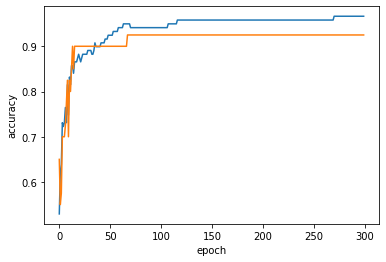

In [10]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

파란색이 훈련세트, 주황색이 테스트 세트 그래프

In [11]:
sc=SGDClassifier(loss='log',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925


SGDClassifier 는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춘다. tol 매개변수에서 향상될 최솟값을 지정한다. 
앞의 코드에서는 tol매개변수를 none으로 지정하여 자동으로 멈추지 않고 max_iter=100만큼 무조건 반복하게 했따

In [12]:
sc=SGDClassifier(loss='hinge',max_iter=100,tol=None)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.9411764705882353
0.925
